C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


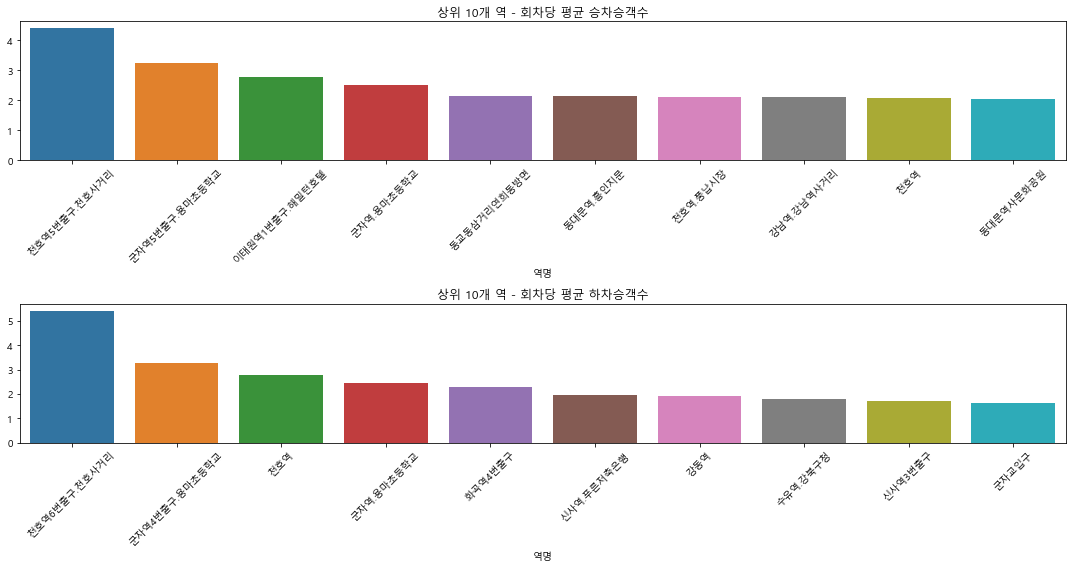

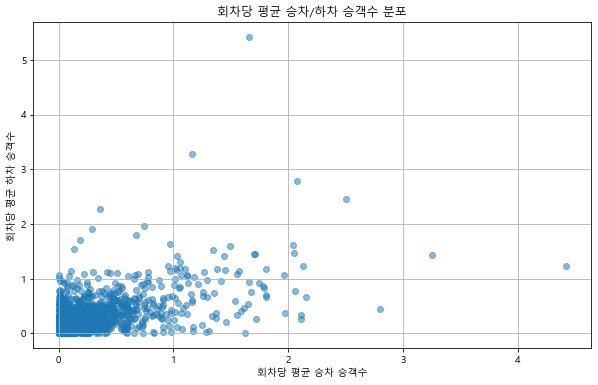

In [20]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 파일 경로
folder_path = r'C:\Users\User\Desktop\BigData\Dataset\NBusDataset'

# 파일들을 통합하기
all_data = pd.DataFrame()
for year in range(2015, 2024):
    file_path = os.path.join(folder_path, f'{year}_NBusData.csv')
    df = pd.read_csv(file_path, encoding='cp949')
    all_data = pd.concat([all_data, df])

# 정류장 이름에서 괄호와 숫자 제거
all_data['역명'] = all_data['역명'].str.replace(r'\(\d+\)', '', regex=True)

# 역별 회당 평균 승차승객수와 하차승객수 계산
average_boarding = all_data.groupby('역명')['회당평균승차승객수'].mean()
average_alighting = all_data.groupby('역명')['회당평균하차승객수'].mean()

# 상위 10개 역 추출
top_boarding_stations = average_boarding.sort_values(ascending=False).head(10)
top_alighting_stations = average_alighting.sort_values(ascending=False).head(10)

# 시각화
plt.figure(figsize=(15, 8))

plt.subplot(2, 1, 1)
sns.barplot(x=top_boarding_stations.index, y=top_boarding_stations.values)
plt.title('상위 10개 역 - 회차당 평균 승차승객수')
plt.xticks(rotation=45)

plt.subplot(2, 1, 2)
sns.barplot(x=top_alighting_stations.index, y=top_alighting_stations.values)
plt.title('상위 10개 역 - 회차당 평균 하차승객수')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 산점도 시각화
plt.figure(figsize=(10, 6))

plt.scatter(average_boarding, average_alighting, alpha=0.5)
plt.title('회차당 평균 승차/하차 승객수 분포')
plt.xlabel('회차당 평균 승차 승객수')
plt.ylabel('회차당 평균 하차 승객수')
plt.grid(True)
plt.show()

C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


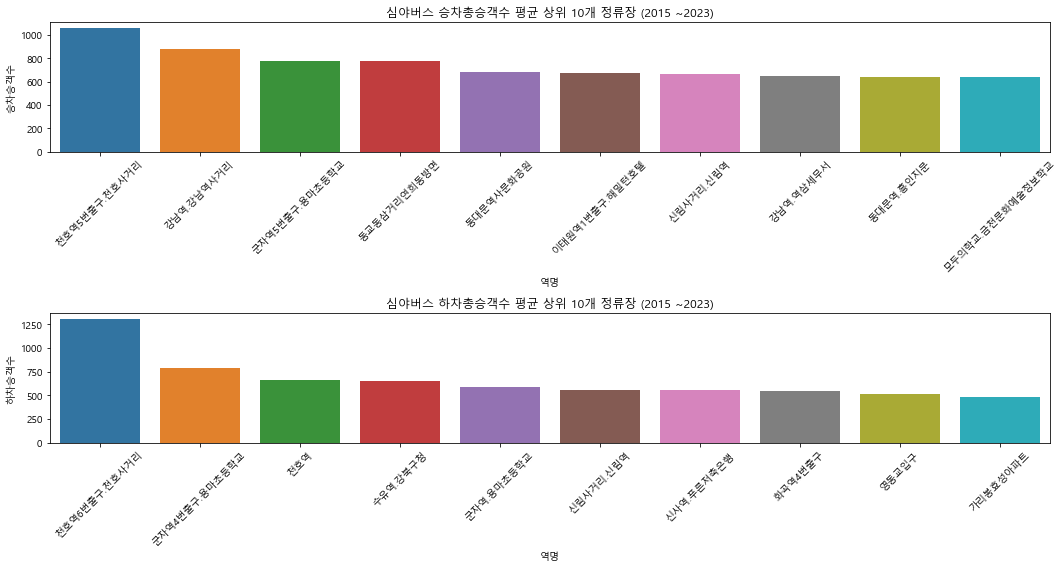

In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

# 한글 폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

# 파일 경로
folder_path = r'C:\Users\User\Desktop\BigData\Dataset\NBusDataset'

# 파일들을 통합하기
all_data = pd.DataFrame()
for year in range(2015, 2024):
    file_path = os.path.join(folder_path, f'{year}_NBusData.csv')
    df = pd.read_csv(file_path, encoding='cp949')
    all_data = pd.concat([all_data, df])

# 정류장 이름에서 괄호와 숫자 제거
all_data['역명'] = all_data['역명'].str.replace(r'\(\d+\)', '', regex=True)

# 역별 승차총승객수, 하차총승객수 계산
total_boarding = all_data.groupby('역명')['승차총승객수'].mean()
total_alighting = all_data.groupby('역명')['하차총승객수'].mean()

# 상위 10개 역 추출
top_total_boarding_stations = total_boarding.sort_values(ascending=False).head(10)
top_total_alighting_stations = total_alighting.sort_values(ascending=False).head(10)

# 시각화 - 총 승차승객수, 총 하차승객수
plt.figure(figsize=(15, 8))

plt.subplot(2, 1, 1)
sns.barplot(x=top_total_boarding_stations.index, y=top_total_boarding_stations.values)
plt.title('심야버스 승차총승객수 평균 상위 10개 정류장 (2015 ~2023)')
plt.xticks(rotation=45)
plt.ylabel('승차승객수')

plt.subplot(2, 1, 2)
sns.barplot(x=top_total_alighting_stations.index, y=top_total_alighting_stations.values)
plt.title('심야버스 하차총승객수 평균 상위 10개 정류장 (2015 ~2023)')
plt.xticks(rotation=45)
plt.ylabel('하차승객수')

plt.tight_layout()
plt.show()
